# Single Path One-Shot Neural Architecture Search using Random Search

# Analysis notebook

## Setup

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

### Read saved data

In [2]:
with open('random_search_1000_models_supernet_advanced_360.json', 'r') as f:
    search_data = json.load(f)

In [3]:
accuracy = np.array(search_data['accuracy'])
loss = np.array(search_data['loss'])
macs = np.array(search_data['macs'])
params = np.array(search_data['params'])
architectures = search_data['arch']

### Define MAC limit as per task constraints

In [4]:
target_latency = 30 * 1e6

suitable_arch_indices = (macs <= target_latency)

### Show all evaluations

In [5]:
for i in np.argsort(accuracy)[::-1]:
    print(f'{accuracy[i]:.2%} {macs[i]:.2f} {architectures[i]}')

85.90% 48146944.00 [3, 4, 4, 5, 4, 5, 4, 5]
85.86% 45497344.00 [4, 5, 4, 4, 5, 5, 0, 4]
85.78% 40184832.00 [4, 5, 4, 5, 2, 2, 1, 3]
85.77% 43423744.00 [4, 4, 4, 1, 5, 4, 3, 5]
85.74% 44604928.00 [4, 4, 5, 1, 3, 5, 4, 5]
85.73% 39290880.00 [4, 4, 4, 1, 1, 4, 5, 3]
85.72% 38117888.00 [4, 5, 4, 2, 5, 4, 1, 0]
85.70% 34575360.00 [4, 4, 4, 5, 2, 2, 0, 0]
85.67% 35758080.00 [4, 5, 5, 4, 1, 1, 0, 2]
85.66% 40177152.00 [4, 3, 4, 3, 5, 3, 2, 3]
85.66% 33986048.00 [4, 5, 5, 3, 0, 1, 3, 0]
85.65% 37522944.00 [4, 5, 4, 1, 1, 2, 3, 4]
85.64% 36630016.00 [4, 2, 4, 2, 5, 0, 2, 5]
85.63% 44904448.00 [4, 5, 3, 4, 3, 4, 5, 3]
85.62% 43429888.00 [4, 5, 4, 4, 2, 4, 2, 4]
85.61% 35454464.00 [4, 4, 4, 0, 3, 4, 0, 3]
85.60% 38405632.00 [4, 4, 4, 2, 0, 2, 5, 4]
85.59% 40771072.00 [4, 4, 5, 2, 5, 3, 3, 2]
85.59% 44018176.00 [4, 5, 5, 1, 3, 5, 2, 5]
85.58% 36636160.00 [3, 4, 4, 3, 4, 3, 3, 0]
85.57% 35161600.00 [4, 4, 5, 1, 3, 2, 0, 3]
85.56% 43722752.00 [4, 5, 3, 3, 3, 4, 5, 3]
85.56% 37231616.00 [4, 5, 5, 3, 

### Show value distributions

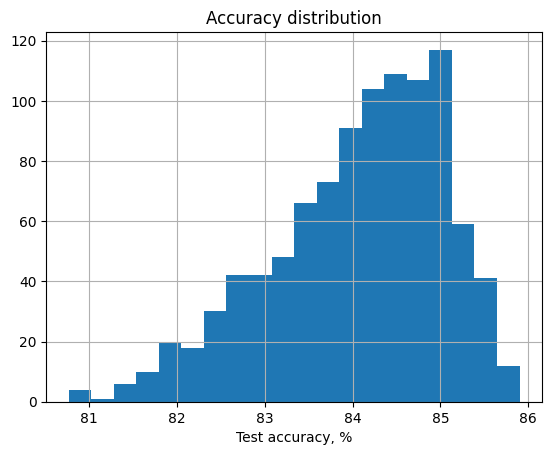

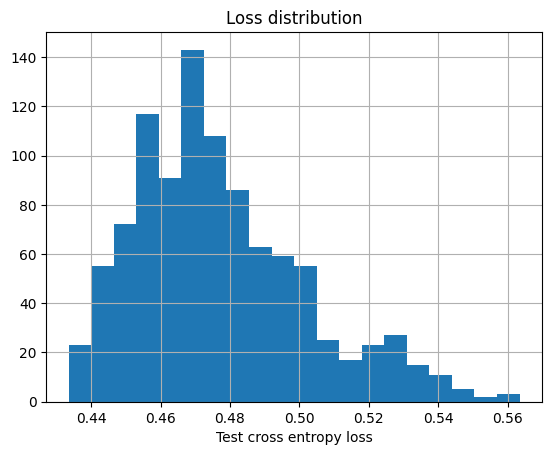

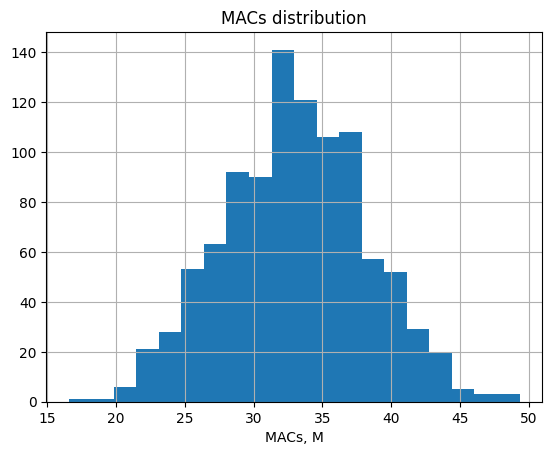

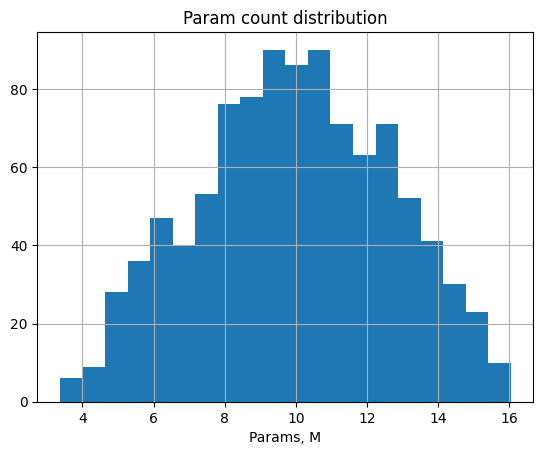

In [6]:
plt.title('Accuracy distribution')
plt.hist(accuracy * 100, bins=20)
plt.xlabel('Test accuracy, %')
plt.grid()
plt.show()

plt.title('Loss distribution')
plt.hist(loss, bins=20)
plt.xlabel('Test cross entropy loss')
plt.grid()
plt.show()

plt.title('MACs distribution')
plt.hist(macs / 1e6, bins=20)
plt.xlabel('MACs, M')
plt.grid()
plt.show()

plt.title('Param count distribution')
plt.hist(params / 1e6, bins=20)
plt.xlabel('Params, M')
plt.grid()
plt.show()

### Find the best architecture

In [7]:
# Keep accuracy if arch satisfies MACs contraint and use 0 otherwise.
best_arch_index = (suitable_arch_indices * accuracy).argmax()

best_arch = architectures[best_arch_index]

print(f'Best architecture: {best_arch}')
print(
    f'MACs={(macs[best_arch_index] / 1e6):.2f}M, '
    f'params={params[best_arch_index] / 1e6:.2f}M, '
    f'accuracy={accuracy[best_arch_index]:.2%}, '
    f'loss={loss[best_arch_index]:.4f}'
)
print()

print(f'Mean MACs: {macs.mean() / 1e6:.2f}M')
print(f'Mean test accuracy: {accuracy.mean():.2%}')

Best architecture: [4, 1, 4, 5, 1, 0, 1, 0]
MACs=28.66M, params=4.73M, accuracy=85.42%, loss=0.4555

Mean MACs: 33.02M
Mean test accuracy: 84.06%


### Final analysis

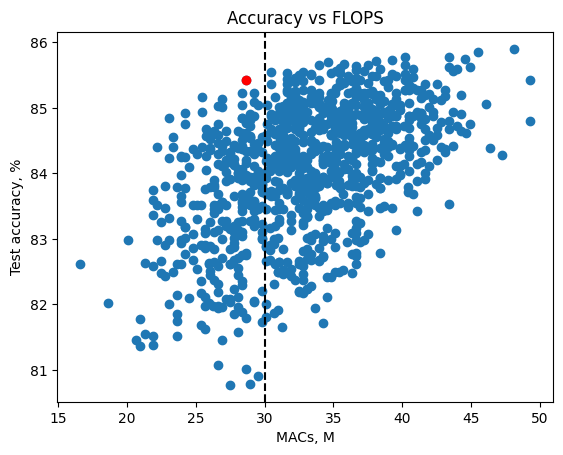

Total number of architectures satisfying latency contraint: 282 (28.2%)


In [8]:
plt.title('Accuracy vs FLOPS')
plt.axvline(target_latency / 1e6, c='k', linestyle='--')
plt.scatter(macs / 1e6, accuracy * 100)
plt.scatter([macs[best_arch_index] / 1e6], accuracy[best_arch_index] * 100, c='r')
plt.xlabel('MACs, M')
plt.ylabel('Test accuracy, %')
plt.show()

print(
    f'Total number of architectures satisfying latency contraint: {suitable_arch_indices.sum()} '
    f'({suitable_arch_indices.sum() / len(macs):.1%})'
)

## Observations from the analysis

1. Now the search space good! 30% of architectures satisfy MACs contraint, yay!
2. The best architecture using SPOS & Random Search is [4, 1, 4, 5, 1, 0, 1, 0] with 28.7M MACs and 85.4% test accuracy.